#22.4 Numerical Error and Instability

There are two main issues to consider with regard to integration schemes for ODEs: accuracy and stability. Accuracy refers to a scheme’s ability to get close to the exact solution, which is usually unknown, as a function of the step size $h$. Previous chapters have referred to accuracy using the notation $O(h^p)$. The same notation translates to solving ODEs. The stability of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable. Some integration schemes are stable for certain choices of h and unstable for others; these integration schemes are also referred to as unstable.

To illustrate issues of stability, we numerically solve the pendulum equation using the Euler Explicit, Euler Implicit, and Trapezoidal Formulas.

**Example:**

Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval $[0,5]$ in increments of $0.1$ and for an initial solution of $S_0 = \left[\begin{array}{c} 1\\0 \end{array}\right]$. For the model parameters using $\sqrt{\frac{g}{l}} = 4$. Plot the approximate solution on a single graph

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline 

In [2]:
h = 0.1
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

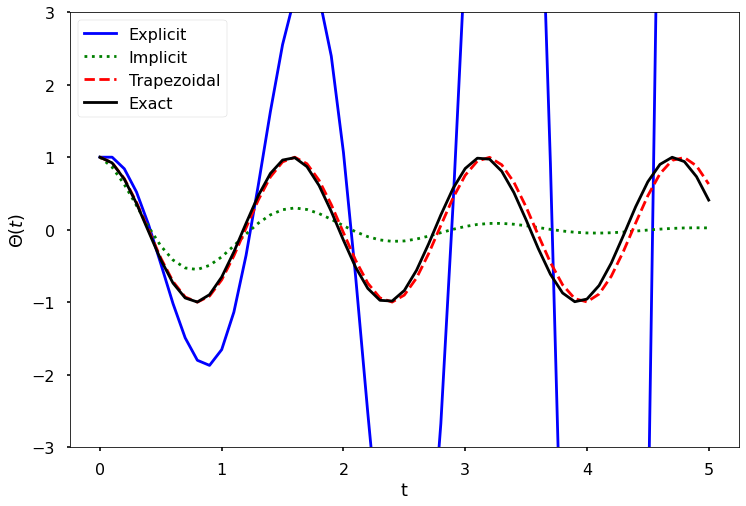

In [3]:
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

#22.5 Predictor-Corrector and Runge Kutta Methods

##Predictor-Corrector Methods

The midpoint method has a predictor step:

$S\left(t_{j} + \frac{h}{2}\right) = S(t_j) + \frac{h}{2}F(t_j, S(t_j))$

which is the prediction of the solution value halfway between $t_j$ and $t_{j+1}$.

It then computes the corrector step:

$S(t_{j+1}) = S(t_j) + hF\left(t_j + \frac{h}{2}, S\left(t_{j} +
\frac{h}{2}\right)\right)$

which computes the solution at $S(t_{j+1})$ from $S(t_j)$ but using the derivative from $S\left(t_{j} + \frac{h}{2}\right)$.


##Runge Kutta Methods

**Runge Kutta (RK)** methods are one of the most widely used methods for solving ODEs. Recall that the Euler method uses the first two terms in Taylor series to approximate the numerical integration, which is linear:

$S(t_{j+1}) = S(t_j + h) = S(t_j) + h \cdot S'(t_j)$

We can greatly improve the accuracy of numerical integration if we keep more terms of the series in

$S(t_{j+1}) = S(t_j + h) = S(t_j) + S'(t_j)h + \frac{1}{2!}$$S''(t_j)h^2 + \cdots + \frac{1}{n!}S^{(n)}(t_j)h^n$

In order to get this more accurate solution, we need to derive the expressions of $S''(t_j), S'''(t_j), \cdots, S^{(n)}(t_j)$. 

In [4]:
def rungekutta1(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i])
    return y

##Second order Runge Kutta method


Let $\frac{dS(t)}{dt} = F(t,S(t))$. then we can assume an integration formula the form of

$S(t + h) = S(t) + c_1F(t, S(t))h + c_2F[t+ph, S(t)+qhF(t, S(t))]h$

We can define:

$\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+ph, S(t_j)+qhk_1\right)\\
\end{eqnarray*}$

where we have:

$S(t_{j+1}) = S(t_j) + \frac{1}{2}(k_1+k_2)h$

In [5]:
def rungekutta2(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h * f(y[i] + f(y[i], t[i]) * h / 2., t[i] + h / 2.)
    return y

##Fourth-order Runge Kutta method

A classical method for integrating ODEs with a high order of accuracy is the Fourth Order Runge Kutta (RK4) method. It is obtained from the Taylor series using similar approach we just discussed in the second-order method. This method uses four points $k_1,k_2,k_3,$ and $k_4$. A weighted average of these is used to produce the approximation of the solution. The formula is as follows.

$\begin{split}
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h\right)\\
k_3 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h\right)\\
k_4 & = & F(t_j+h,S(t_j)+k_3h)
\end{eqnarray*}
\end{split}$

Therefore, we will have:

$S(t_{j+1}) = S(t_j) + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right).$

As indicated by its name, the RK4 method is fourth-order accurate, or $O(h^4)$.

In [6]:
def RK4(t0,tn,n,y0):
  h = abs(tn-t0)/n
  t = linspace(t0,tn,n+1)
  y = zeros(n+1)
  y[0] = y0
  for i in range(0,n):
      K1 = f(t[i],y[i])
      K2 = f(t[i]+h/2,y[i]+K1*h/2)
      K3 = f(t[i]+h/2,y[i]+K2*h/2)
      K4 = f(t[i]+h,y[i]+K3*h)
      y[i+1] = y[i] + h*(K1+2*K2+2*K3+K4)/6
  return y


In [7]:
def rungekutta4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2.)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2.)
        k4 = f(y[i] + k3 * h, t[i] + h)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

#22.6 Python ODE Solvers

The way we use the solver to solve the differential equation is: 

**solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)**

**Example:**

Consider the ODE $\frac{dS(t)}{dt}=\cos(t)$ for an initial value $S_0=0$. The exact solution to this problem is $S(t)=sin(t)$. Use solve_ivp to approximate the solution to this initial value problem over the interval $[0,π]$. Plot the approximate solution versus the exact solution and the relative error over time.


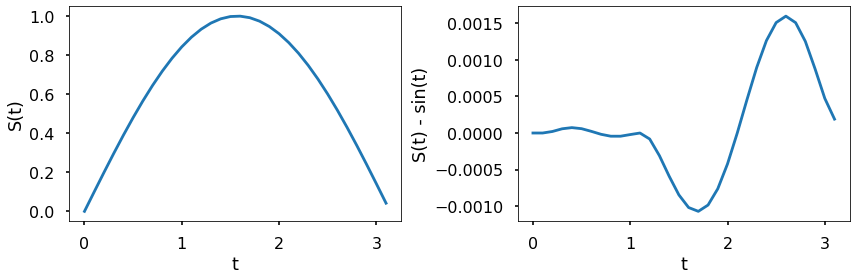

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

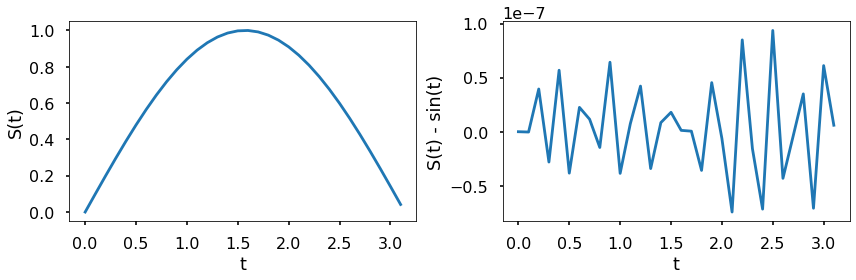

In [9]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

**Example:**

Consider the ODE $\frac{dS(t)}{dt} = -S(t),
$ with an initial value of $S_0=1$. The exact solution to this problem is $S(t)=e^{−t}$. Use solve_ivp to approximate the solution to this initial value problem over the interval $[0,1]$. Plot the approximate solution versus the exact solution, and the relative error over time.

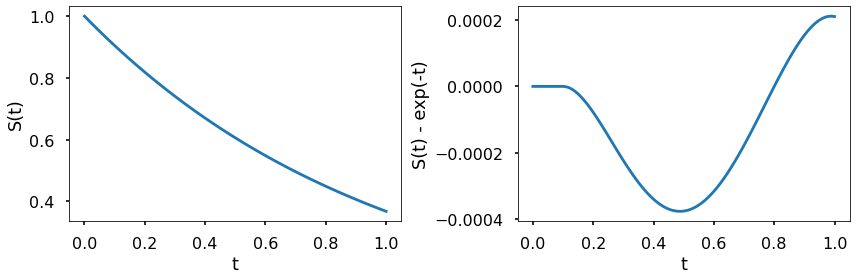

In [10]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

**Example:**

Consider ODE $\frac{dS(t)}{dt} = t^2$ for initial condition $S_0=−1$ has the exact solution $S(t)= \frac{-1}{t+1}.$


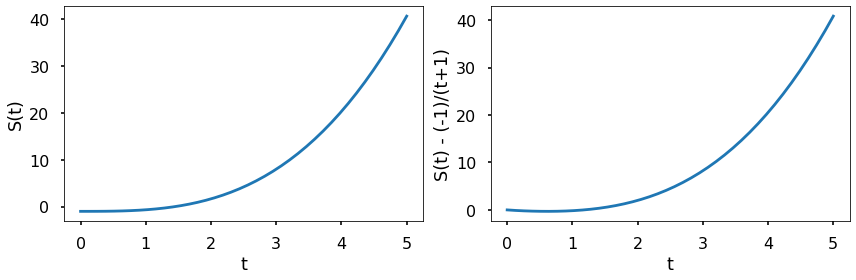

In [11]:
F = lambda t, s: t**2

t_eval = np.linspace(0, 5, 40)
sol = solve_ivp(F, [0, 5], [-1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + 1/(sol.t+1))
plt.xlabel('t')
plt.ylabel('S(t) - (-1)/(t+1)')
plt.tight_layout()
plt.show()

**Example:**

Let the state of a system be defined by $S(t) = \left[\begin{array}{c} x(t) \\y(t) \end{array}\right]$, and let the evolution of the system be defined by the ODE $\begin{split}
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & t^2 \\
-t & 0
\end{array}\right]S(t).
\end{split}
$
Use solve_ivp to solve this ODE for the time interval [0,10] with an initial value of $S_0 = \left[\begin{array}{c} 1 \\1 \end{array}\right]$. Plot the solution in $(x(t),y(t))$.

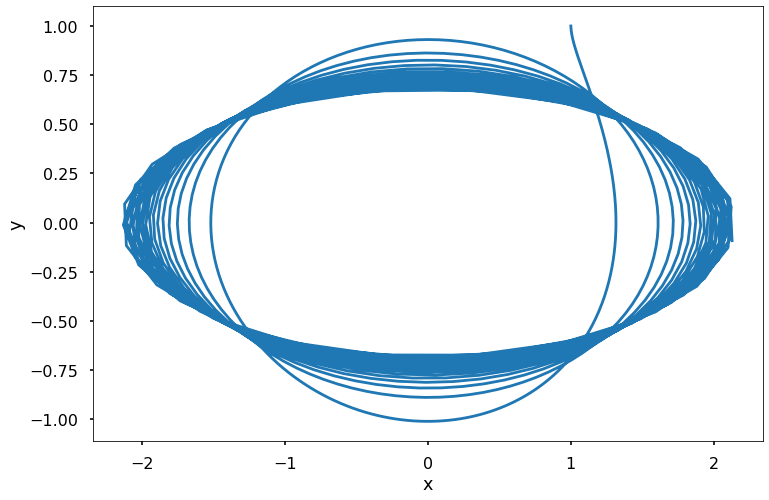

In [12]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()